<a href="https://colab.research.google.com/github/BachokunIAR/DL-tensorflow/blob/main/ANN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Loading the data
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (60000, 28, 28)
y_train.shape (60000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# building the model

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape =(28,28)),
  tf.keras.layers.Dense(128,activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.src.metrics import sparse_categorical_accuracy
from keras.src.losses import BinaryCrossentropy

model.compile(optimizer = 'Adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3060 - accuracy: 0.9111 - val_loss: 0.1464 - val_accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1511 - accuracy: 0.9550 - val_loss: 0.1047 - val_accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1121 - accuracy: 0.9663 - val_loss: 0.0883 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0873 - accuracy: 0.9734 - val_loss: 0.0793 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0754 - accuracy: 0.9761 - val_loss: 0.0780 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0826 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0717 - val_acc

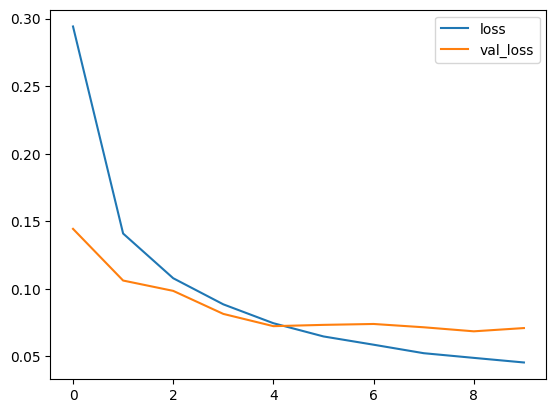

In [ ]:
# loss per iteration

plt.plot(h.history['loss'],label = 'loss')
plt.plot(h.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

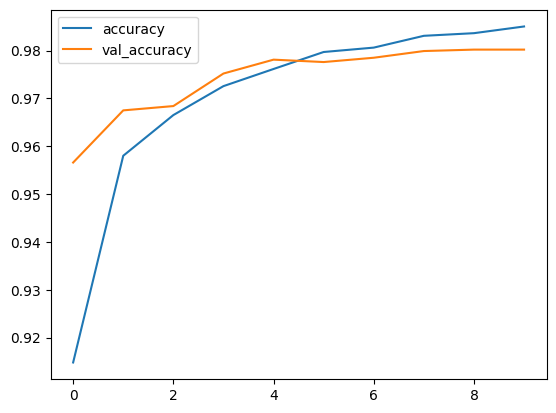

In [ ]:
plt.plot(h.history['accuracy'],label = 'accuracy')
plt.plot(h.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9807
[0.06889748573303223, 0.9807000160217285]


In [ ]:
# ploting the confusion matrix

from sklearn.metrics import confusion_matrix

import numpy as np
import itertools


def plot_confusion_matrix(cm,classes, normalize = False,
                          title = 'Confusion matrix',
                          cmap=plt.cm.Reds):

  """ This function prints and plots the confusion matrix .
  Normalization can be apply be setting the normalier = True """


  if normalize:
    cm  = cm.astype('float')/cm.sum(axis =1)[:,np.newaxis]
    print('Normalization confusion matrix')

  else:
    print('Confusion matrix without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  #tick_marks = np.arange(classes)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes, rotation =45)
  plt.ylabel(tick_marks,classes)

  fmt = '.2f' if  normalize else 'd'
  thresh = cm.max()/2.
  for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()




313/313 [==============================] - 1s 3ms/step


<Axes: >

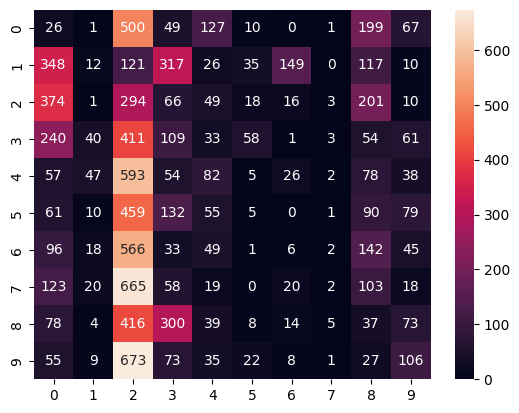

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
#plot_confusion_matrix(cm,list(range(10)))
sns.heatmap(cm, annot=True, fmt='g')



